##  Author : Pankaj Patil



### Task 2 : Prediction using Unsupervised Machine Learning

### GRIP @ The Sparks Foundation Sept 2021

## Domian :- Data Science and Buiseness Analytics

#  Import All The Required Libaries

In [1]:
# import all the required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

###  Loading Data Set

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# To check the info of all data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Statistical summary for numeric data include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
# To check the correlation between the features
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [7]:
df1 = df.drop(columns = 'Id',axis = 1)

In [8]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## To Covert Categirial Data int numeric Variables

In [10]:
feature = pd.factorize(df['Species'])
df1['Species'] = feature[0]

In [11]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# to check null value
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Visualisong the Input data

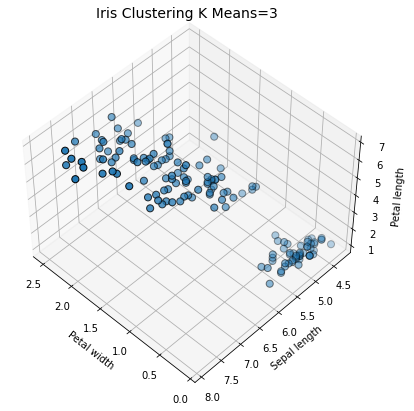

In [15]:
#Plotting
fig = plt.figure(1, figsize=(7,5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=14)
plt.show()

## Finding the optimal numbers of K values by using 'ELBOW METHOD'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, ' The Elbow Methd')

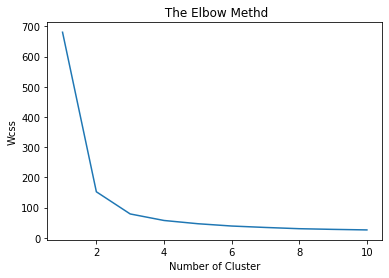

In [16]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# plot the result and observe  the elbow method 
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('Wcss')
plt.title(" The Elbow Methd")


In [ ]:
From the above graph its clearly see that why it is called "Elbow Method" because the look of graph is seen like Elbow.
From that grap value of Wcss is decreases suddenly as number of clusters increases and it will decrease gradually at the edge of elbow then it remains constant 
So that from the above graph we choose the value of is 3 i.e k=3

So that from the above graph we choose the value of is 3 i.e k=3

## Data Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
fea_scaler = scaler.transform(x)

In [59]:
scaled_features = pd.DataFrame(fea_scaler)
df2 = scaled_features
df2.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Data Preprocessing

In [60]:
 x = df2.iloc[:,:-1].values
 y = df2.iloc[:,-1].values

In [61]:
x

array([[-0.90068117,  1.03205722, -1.3412724 ],
       [-1.14301691, -0.1249576 , -1.3412724 ],
       [-1.38535265,  0.33784833, -1.39813811],
       [-1.50652052,  0.10644536, -1.2844067 ],
       [-1.02184904,  1.26346019, -1.3412724 ],
       [-0.53717756,  1.95766909, -1.17067529],
       [-1.50652052,  0.80065426, -1.3412724 ],
       [-1.02184904,  0.80065426, -1.2844067 ],
       [-1.74885626, -0.35636057, -1.3412724 ],
       [-1.14301691,  0.10644536, -1.2844067 ],
       [-0.53717756,  1.49486315, -1.2844067 ],
       [-1.26418478,  0.80065426, -1.227541  ],
       [-1.26418478, -0.1249576 , -1.3412724 ],
       [-1.87002413, -0.1249576 , -1.51186952],
       [-0.05250608,  2.18907205, -1.45500381],
       [-0.17367395,  3.11468391, -1.2844067 ],
       [-0.53717756,  1.95766909, -1.39813811],
       [-0.90068117,  1.03205722, -1.3412724 ],
       [-0.17367395,  1.72626612, -1.17067529],
       [-0.90068117,  1.72626612, -1.2844067 ],
       [-0.53717756,  0.80065426, -1.170

In [62]:
y

array([-1.31297673, -1.31297673, -1.31297673, -1.31297673, -1.31297673,
       -1.05003079, -1.18150376, -1.31297673, -1.31297673, -1.4444497 ,
       -1.31297673, -1.31297673, -1.4444497 , -1.4444497 , -1.31297673,
       -1.05003079, -1.05003079, -1.18150376, -1.18150376, -1.18150376,
       -1.31297673, -1.05003079, -1.31297673, -0.91855782, -1.31297673,
       -1.31297673, -1.05003079, -1.31297673, -1.31297673, -1.31297673,
       -1.31297673, -1.05003079, -1.4444497 , -1.31297673, -1.4444497 ,
       -1.31297673, -1.31297673, -1.4444497 , -1.31297673, -1.31297673,
       -1.18150376, -1.18150376, -1.31297673, -0.78708485, -1.05003079,
       -1.18150376, -1.31297673, -1.31297673, -1.31297673, -1.31297673,
        0.26469891,  0.39617188,  0.39617188,  0.13322594,  0.39617188,
        0.13322594,  0.52764485, -0.26119297,  0.13322594,  0.26469891,
       -0.26119297,  0.39617188, -0.26119297,  0.26469891,  0.13322594,
        0.26469891,  0.39617188, -0.26119297,  0.39617188, -0.12

# Traing The Model


In [63]:
iris_kmeans_model = KMeans(n_clusters =3)
iris_kmeans_model.fit(x)

KMeans(n_clusters=3)

In [64]:
y_pred = iris_kmeans_model.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [65]:
print(iris_kmeans_model.cluster_centers_)

[[-1.00206653  0.89510445 -1.30297509]
 [-0.15389144 -0.94667425  0.29622777]
 [ 1.08926809  0.04859462  0.94866575]]


## Now Visualizing The Model Cluster

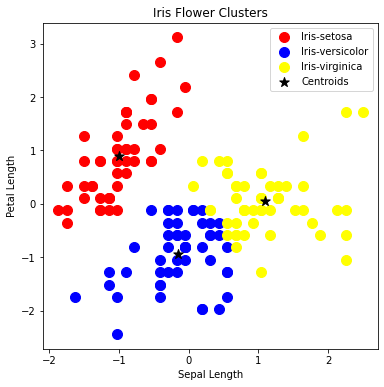

In [68]:
plt.figure(figsize=(6,6))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='yellow',label='Iris-virginica')

plt.scatter(iris_kmeans_model.cluster_centers_[:,0],iris_kmeans_model.cluster_centers_[:,1],s=100,c='black',marker='*', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()
